#### <left>Бронников Максим Андреевич</left>

max120199@gmail.com

#   <center>Домашняя работа №4</center>

## <center> Необходимо построить линейнейный классификатор по первой части набора данных и сделать прогноз о принадлежности объекта наблюдения к одном из классов для второй части набора данных </center>

### Подключим необходимые библиотеки

Для обработки данных нам пригодится визуализация, которую обеспечит библиотека `matplotlib.pyplot` вкупе с модулем `ListedColormap` для визуаллизации классов и библиотека `seaborn` которая отлично работает с визуализацией статистических данных. Библиотека `pandas` позволит нам обработать набор данных и сохранить их в *DataFrame*, а с помощью библиотеки `numpy` реализуем математическую составляющую построения линейного классификатора в матричном виде

In [1]:
import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap

import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Для построения моделей будем использовать уже готовые решения библиотеки `Scikit-learn`, а имнно классы `LogisticRegression` и `KNeighborsClassifier` для построения моделей Логистической регресси и Метода k ближайших соседей соответственно. 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

А также мы будем использовать Кросс-Валидацию, для чего импортируем `cross_val_score` и `cross_validate` для реализации валидайции и подсчета метрики ее результата

In [3]:
from sklearn.model_selection import cross_val_score, cross_validate

------

### Импортируем набор данных

С помощью функции `read_csv` импортируем набор данных для тренировки. С помощью функции `describe` получим представление о наборе данных взглянув на основные характеристики столбцов набора.

In [4]:
dataset = pd.read_csv("input/train.csv")

dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,850.000000,850.000000,686.000000,850.000000,850.000000,849.000000,850.000000
mean,656.848235,2.295294,29.850583,0.470588,0.368235,33.507121,0.382353
std,371.701600,0.832837,14.141324,0.954664,0.865340,53.553686,0.486248
min,1.000000,1.000000,0.330000,0.000000,0.000000,0.000000,0.000000
25%,340.750000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,657.000000,3.000000,28.000000,0.000000,0.000000,14.400000,0.000000
75%,969.750000,3.000000,38.000000,1.000000,0.000000,30.500000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


------

### Работаем с входными данными

#### Получим еще больше информации о наборе

Получим дополнительную информацию типах и значениях колонок при помощи метода `info`, а также отобразив первые наблюдения таблицы с помощью `head`

In [5]:
print(dataset.info())
dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 12 columns):
PassengerId    850 non-null int64
Pclass         850 non-null int64
Name           850 non-null object
Sex            850 non-null object
Age            686 non-null float64
SibSp          850 non-null int64
Parch          850 non-null int64
Ticket         850 non-null object
Fare           849 non-null float64
Cabin          182 non-null object
Embarked       850 non-null object
Survived       850 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 79.8+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
1,1249,3,"Lockyer, Mr. Edward",male,NaN,0,0,1222,7.8792,NaN,S,0
2,1240,2,"Giles, Mr. Ralph",male,24.0,0,0,248726,13.5000,NaN,S,0
3,221,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S,1
4,1105,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60.0,1,0,24065,26.0000,NaN,S,0


#### Работаем с полом пассажиров

Получим информацию о уникальных значениях столбца `Sex` нашего *DataFrame* и подсчитаем процент женщин среди выживших, а также процент женщин на борту получения хоть какой-то информации о влиянии этого столбца на результирующий стобец

Уникальных элементов: 2
Элементы: ['female' 'male']
Процент женщин среди пассажиров:34.8235294117647%
Процент женщин среди выживших:68.0%


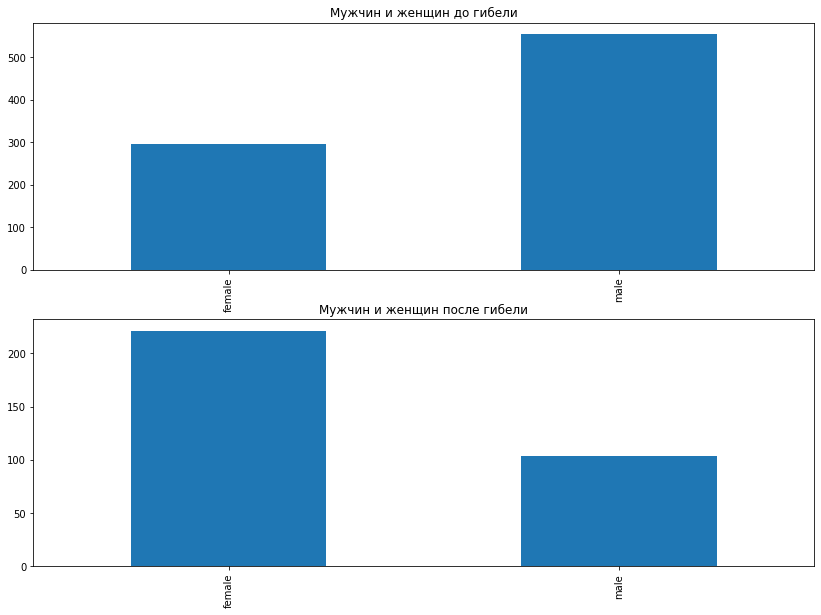

In [6]:
print("Уникальных элементов:", dataset.Sex.nunique())
print("Элементы:", dataset.Sex.unique())

fig = plt.figure(figsize= (14,10))
ax1 = fig.add_subplot(211)
ax1.set_title('Мужчин и женщин до гибели')
ax2 = fig.add_subplot(212)
ax2.set_title('Мужчин и женщин после гибели')


dev_sum = dataset[dataset.Sex == 'female'].shape[0] / dataset.shape[0]

dataset.Sex.value_counts()[['female', 'male']].plot.bar(ax = ax1)
print(r'Процент женщин среди пассажиров:{}%'.format(dev_sum * 100))


dev_sum = dataset.Survived[dataset.Sex == 'female'].sum() / dataset.Survived.sum()

dataset.Sex[dataset.Survived == 1].value_counts()[['female', 'male']].plot.bar(ax = ax2)
print(r'Процент женщин среди выживших:{}%'.format(dev_sum * 100))


Мы видим что значения столбца `Sex` **нельзя игнорировать**, так как прослеживается явная зависимость между полом пасссажира и процентом выживаемости: шанс женщины выжить оказался выше.

Поэтому для последующей работы со столбцом отобразим его значения в числовые интерпритации: $ male = 0$, $female = 1$ и добавим новый столбец в таблицу с полученными значениями

In [7]:
dataset['Man'] = 0
logic_mask = (dataset.Sex == 'female')
dataset.Man[logic_mask] = 1
dataset = dataset.drop(['Sex'], axis = 1)
dataset.head(5)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Man
0,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,1
1,1249,3,"Lockyer, Mr. Edward",NaN,0,0,1222,7.8792,NaN,S,0,0
2,1240,2,"Giles, Mr. Ralph",24.0,0,0,248726,13.5000,NaN,S,0,0
3,221,3,"Sunderland, Mr. Victor Francis",16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S,1,0
4,1105,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",60.0,1,0,24065,26.0000,NaN,S,0,1


#### Работаем с портом погрузки

Попробуем определить наличие зависимости выживаемости от столбца `Embarked`. Для этого визуализруем данные до и после гибели и посмотрим на изменение в долях.

Уникальных элементов: 3
Элементы: ['S' 'C' 'Q']
Процент людей из порта C среди всех пассажиров:20.0%
Процент людей из порта C среди выживших:28.307692307692307%


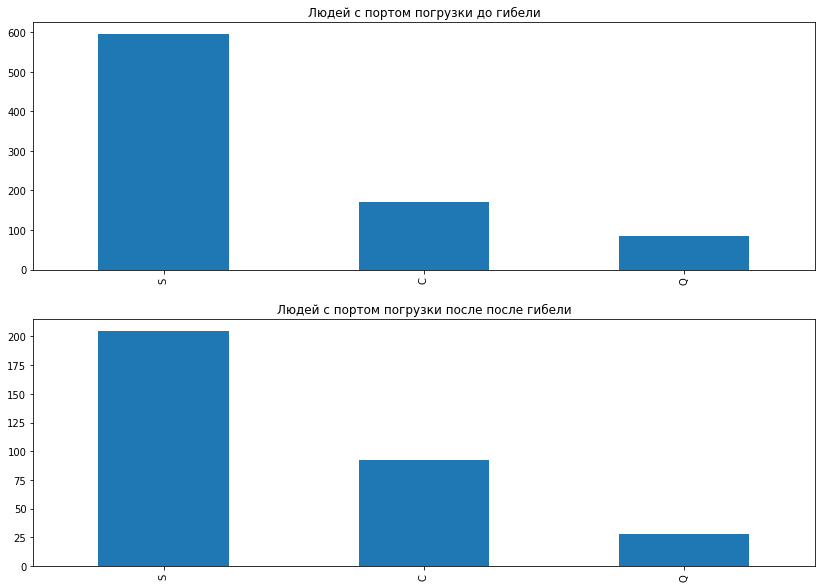

In [8]:
print("Уникальных элементов:", dataset.Embarked.nunique())
print("Элементы:", dataset.Embarked.unique())

fig = plt.figure(figsize= (14,10))
ax1 = fig.add_subplot(211)
ax1.set_title('Людей с портом погрузки до гибели')
ax2 = fig.add_subplot(212)
ax2.set_title('Людей с портом погрузки после после гибели')



dataset.Embarked.value_counts().plot.bar(ax = ax1)

dataset.Embarked[dataset.Survived == 1].value_counts().plot.bar(ax = ax2)


dev_sum = dataset[dataset.Embarked == 'C'].shape[0] / dataset.shape[0]

print(r'Процент людей из порта C среди всех пассажиров:{}%'.format(dev_sum * 100))


dev_sum = dataset.Survived[dataset.Embarked == 'C'].sum() / dataset.Survived.sum()

print(r'Процент людей из порта C среди выживших:{}%'.format(dev_sum * 100))

В данном случае зависимость уже не так явно прослеживается, однако можно отметить, что у людей из порта *C* выживаемость выше, чем у других людей. Отобразим строковые значения в числовые, задав веса для значений и заменив столбец `Embarked` на новый, с числовой интерпритацией.

In [9]:
dataset["NewEmbark"] = 2
dataset.NewEmbark[dataset.Embarked == 'C'] = 3
dataset.NewEmbark[dataset.Embarked == 'Q'] = 1
dataset = dataset.drop(['Embarked'], axis = 1)
dataset.head(5)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Man,NewEmbark
0,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,1,2
1,1249,3,"Lockyer, Mr. Edward",NaN,0,0,1222,7.8792,NaN,0,0,2
2,1240,2,"Giles, Mr. Ralph",24.0,0,0,248726,13.5000,NaN,0,0,2
3,221,3,"Sunderland, Mr. Victor Francis",16.0,0,0,SOTON/OQ 392089,8.0500,NaN,1,0,2
4,1105,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",60.0,1,0,24065,26.0000,NaN,0,1,2


#### Работаем с остальными нечисловыми данными

Заметим, что данные столбца `Cabin` имеют числовую составляющую и гипотетически могут влиять на величину выживаемости.

Для того, чтобы понять влияют ли значения колонки `Cabin` на результирующий столбец попробуем очистить данные столбца и преобразовать их к числовому виду. 

Столбец `Cabin` содержит иформацию(хотя и мало, всего 182 значения) о разположении номера проживания, который упорядочен по литере отсека и числовому номерую. Разделим столбец на 2 новых столбца, и буквенным данным зададим их номер в алфавите, а цфровую оставим без изменения. NaN данные заменим на 0.

In [10]:
seria = dataset.Cabin.str.split().str[-1]
dataset['Gate'] = seria.str[0]
dataset['Numeric'] = seria.str[1::]
dataset.Numeric = pd.to_numeric(dataset.Numeric)

dataset.Numeric.fillna(0)
print("Уникальных элементов:", dataset.Gate.nunique())
print("Элементы:", dataset.Gate.unique())

my_dict = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}

dataset.Gate = dataset.Gate.map(my_dict)

dataset = dataset.drop(['Cabin'], axis = 1)
dataset.head(10)

Уникальных элементов: 8
Элементы: ['B' nan 'E' 'C' 'D' 'A' 'F' 'G' 'T']


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Survived,Man,NewEmbark,Gate,Numeric
0,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,1,2,2.0,42.0
1,1249,3,"Lockyer, Mr. Edward",NaN,0,0,1222,7.8792,0,0,2,NaN,NaN
2,1240,2,"Giles, Mr. Ralph",24.0,0,0,248726,13.5000,0,0,2,NaN,NaN
3,221,3,"Sunderland, Mr. Victor Francis",16.0,0,0,SOTON/OQ 392089,8.0500,1,0,2,NaN,NaN
4,1105,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",60.0,1,0,24065,26.0000,0,1,2,NaN,NaN
5,183,3,"Asplund, Master. Clarence Gustaf Hugo",9.0,4,2,347077,31.3875,0,0,2,NaN,NaN
6,979,3,"Badman, Miss. Emily Louisa",18.0,0,0,A/4 31416,8.0500,1,1,2,NaN,NaN
7,338,1,"Burns, Miss. Elizabeth Margaret",41.0,0,0,16966,134.5000,1,1,3,5.0,40.0
8,87,3,"Ford, Mr. William Neal",16.0,1,3,W./C. 6608,34.3750,0,0,2,NaN,NaN
9,347,2,"Smith, Miss. Marion Elsie",40.0,0,0,31418,13.0000,1,1,2,NaN,NaN


По итогу получили 2 новых столбца числовых данных напрямую зависящих от столбца `Cabin`

Столбец `Ticket` таким легким способом не распарсить, поэтому его мы для обучения брать не будем.
Так же для обчения мы не используем столбец `PassengerId` в силу того, что он не несет в себе информации о пассажирах, кроме идентификации в таблице, а так же столбец `Name`, так как считаем, что имя человека не влияет на его выживаемость, а так же из-за того, что не умеем работать с нечисловыми данными(причина игнорирования столбца `Ticket`)

Выкенем указанные столбцы из таблицы, в результате чего получим таблицу числовых значений.

In [11]:
dataset = dataset.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

dataset.head(10)

,Pclass,Age,SibSp,Parch,Fare,Survived,Man,NewEmbark,Gate,Numeric
0,1,19.0,0,0,30.0000,1,1,2,2.0,42.0
1,3,NaN,0,0,7.8792,0,0,2,NaN,NaN
2,2,24.0,0,0,13.5000,0,0,2,NaN,NaN
3,3,16.0,0,0,8.0500,1,0,2,NaN,NaN
4,2,60.0,1,0,26.0000,0,1,2,NaN,NaN
5,3,9.0,4,2,31.3875,0,0,2,NaN,NaN
6,3,18.0,0,0,8.0500,1,1,2,NaN,NaN
7,1,41.0,0,0,134.5000,1,1,3,5.0,40.0
8,3,16.0,1,3,34.3750,0,0,2,NaN,NaN
9,2,40.0,0,0,13.0000,1,1,2,NaN,NaN


#### Обрабатываем неизвестные данные для оставшихс числовых колонок

Для начала получим информацию о зависимости величин на графике- матрице корелляции.

Корелляция отображает степень зависимости между величинами и распределена на $ [-1, 1] $ , где $1$ - означает полную зависимость, а  $0$ - независимость величин.

Построение этого графика реализует в себе `seaborn` с функцией `heatmap`, а вычисление корелляции производится методом `corr` класса *DataFrame*

Зависимость столбцов друг от друга:


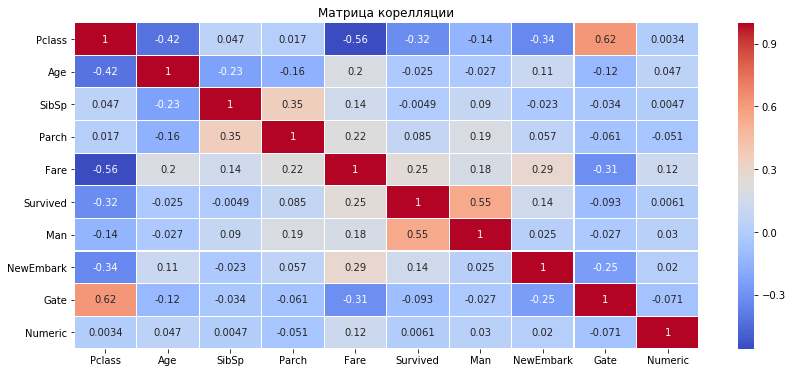

In [12]:
fi = plt.figure(figsize= (14, 6))
ax1 = fi.add_subplot()
ax1.set_title('Матрица корелляции')

sns.heatmap(dataset.corr(), annot=True, cmap = "coolwarm", linewidth = 0.1, ax = ax1)

print("Зависимость столбцов друг от друга:")

#### Заполним пропущенные данные в столбце Age и Fare

Взглянув на матрицу кореляции можем определить что существует довольно ощутимая зависимость между значением возраста `Age` пассажира и классом `Pclass` перевозки, полом пассажира `Man` и портом назначения `NewEmbark`. Поэтому сгруппируем признаки по этим трем параметрам и посмотрим на зависимость `Age` от параметров(а именно среднего возраста). Мы можем это сделать во многом благодаря тому, что значения этих параметров не потеряны и присутствуют для всех наблюдений

Взглянем на эту зависимость:

Значения возраста в диапазоне от 0.33 до 80.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
Pclass       850 non-null int64
Age          849 non-null float64
SibSp        850 non-null int64
Parch        850 non-null int64
Fare         849 non-null float64
Survived     850 non-null int64
Man          850 non-null int64
NewEmbark    850 non-null int64
Gate         182 non-null float64
Numeric      176 non-null float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


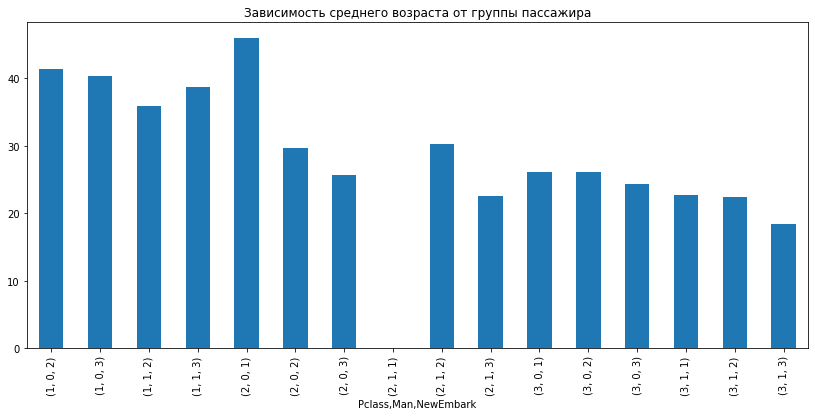

In [13]:
fi = plt.figure(figsize= (14, 6))
ax1 = fi.add_subplot()
ax1.set_title('Зависимость среднего возраста от группы пассажира')

newset = dataset.groupby(['Pclass', 'Man', 'NewEmbark']).mean()

print("Значения возраста в диапазоне от", dataset.Age[dataset.Age.notnull()].min(), \
      "до", dataset.Age[dataset.Age.notnull()].max())

newset.Age.plot.bar(ax = ax1)

man = dataset.Man.unique()
pclass = dataset.Pclass.unique()
newembark = dataset.NewEmbark.unique()

for i in pclass:
    for j in man:
        for k in newembark:
            dataset.Age[(dataset.Age.isnull()) & (dataset.Pclass == i) & (dataset.Man == j) & (dataset.NewEmbark == k)] = \
            dataset.Age[(dataset.Age.notnull()) & (dataset.Pclass == i) & (dataset.Man == j) & (dataset.NewEmbark == k)].mean()
            
            
dataset.info()

Как мы можем видеть средние значения возраста меняют свои значения в зависимости от группы, к которой они относятся, поэтому неизвестным значениям мы дали значение среднего по группе, ведь возраст судя по зависимости - одна из характеристик группы.

В итоге мы заполнили все значения возраста в зависимости от группы кроме одного, который не имел среднего значения в своей группе. Присвоим этому пассажиру возраст средний по всему кораблю. Также сделаем с пропущенным значением в столбце `Fare`:

In [14]:
dataset.Age[dataset.Age.isnull()] = dataset.Age[dataset.Age.notnull()].mean()
dataset.Fare[dataset.Fare.isnull()] = dataset.Fare[dataset.Fare.notnull()].mean()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
Pclass       850 non-null int64
Age          850 non-null float64
SibSp        850 non-null int64
Parch        850 non-null int64
Fare         850 non-null float64
Survived     850 non-null int64
Man          850 non-null int64
NewEmbark    850 non-null int64
Gate         182 non-null float64
Numeric      176 non-null float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


#### Разберемся со столбцами производными от Cabin:

Столбец `Numeric` имеет малую корелляцию со всеми столбцами, поэтому просто присвоим пропущенным данным значение 0 в силу большого колличества пропущенных элементов.

Что касается столбца `Gate`, то он имеет сильную зависимость от класса поездки пассажира `Pclass`, поэтому присвоим пропущенным значениям столбца среднее значение по группе:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
Pclass       850 non-null int64
Age          850 non-null float64
SibSp        850 non-null int64
Parch        850 non-null int64
Fare         850 non-null float64
Survived     850 non-null int64
Man          850 non-null int64
NewEmbark    850 non-null int64
Gate         850 non-null float64
Numeric      850 non-null float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


,Pclass,Age,SibSp,Parch,Fare,Survived,Man,NewEmbark,Gate,Numeric
0,1,19.000000,0,0,30.0000,1,1,2,2.000000,42.0
1,3,26.115602,0,0,7.8792,0,0,2,6.100000,0.0
2,2,24.000000,0,0,13.5000,0,0,2,5.058824,0.0
3,3,16.000000,0,0,8.0500,1,0,2,6.100000,0.0
4,2,60.000000,1,0,26.0000,0,1,2,5.058824,0.0
5,3,9.000000,4,2,31.3875,0,0,2,6.100000,0.0


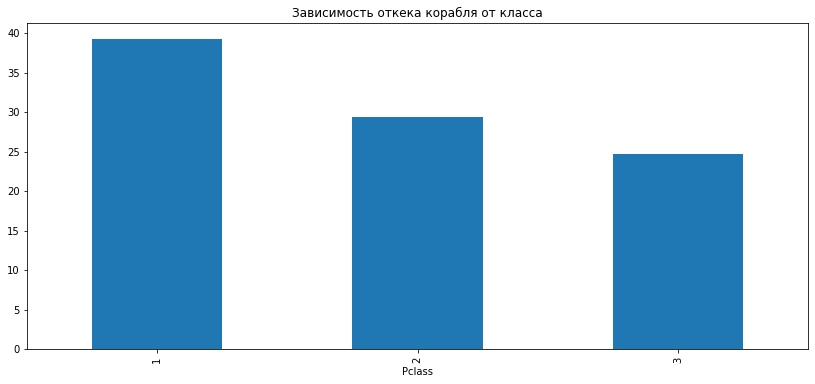

In [15]:
fi = plt.figure(figsize= (14, 6))
ax1 = fi.add_subplot()
ax1.set_title('Зависимость отсека корабля от класса')

newset = dataset.groupby(['Pclass']).mean()


newset.Age.plot.bar(ax = ax1)

for k in pclass:
        dataset.Gate[(dataset.Gate.isnull()) & (dataset.Pclass == k)] = \
        dataset.Gate[(dataset.Gate.notnull()) & (dataset.Pclass == k)].mean()
        
dataset.Numeric[dataset.Numeric.isnull()] = 0
#dataset = dataset.drop(['Fare', 'NewEmbark'], axis = 1)
dataset.info()
dataset.head(6)

Теперь наши значения в тренировочных данных готовы для обработки. Получим столбец `Survived` и остальные признаки в отдельные `numpy.array` `Y_train` и `X_train` соответственно и сделаем туже самую обработку для тестовых данных:

In [16]:
Y_train = dataset[['Survived']].to_numpy().reshape(dataset.shape[0], 1)
dataset = dataset.drop(['Survived'], axis = 1)
dataset.head()

X_train = dataset.to_numpy().reshape(dataset.shape)
print(X_train.shape)

testset = pd.read_csv("input/test.csv")

testset['Man'] = 0
logic_mask = (testset.Sex == 'female')
testset.Man[logic_mask] = 1
testset = testset.drop(['Sex'], axis = 1)

testset["NewEmbark"] = 2
testset.NewEmbark[testset.Embarked == 'C'] = 3
testset.NewEmbark[testset.Embarked == 'Q'] = 1
testset = testset.drop(['Embarked'], axis = 1)

seria = testset.Cabin.str.split().str[-1]
testset['Gate'] = seria.str[0]
testset['Numeric'] = seria.str[1::]
testset.Numeric = pd.to_numeric(testset.Numeric)

testset.Numeric.fillna(0)
print("Уникальных элементов:", testset.Gate.nunique())
print("Элементы:", testset.Gate.unique())

testset.Gate = testset.Gate.map(my_dict)

testset = testset.drop(['Cabin'], axis = 1)

Pass_Id = testset['PassengerId']

testset = testset.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

for i in pclass:
    for j in man:
        for k in newembark:
            testset.Age[(testset.Age.isnull()) & (testset.Pclass == i) & (testset.Man == j) & (testset.NewEmbark == k)] = \
            testset.Age[(testset.Age.notnull()) & (testset.Pclass == i) & (testset.Man == j) & (testset.NewEmbark == k)].mean()
            

testset.Age[testset.Age.isnull()] = testset.Age[testset.Age.notnull()].mean()

testset.Fare[testset.Fare.isnull()] = testset.Fare[testset.Fare.notnull()].mean()

for k in pclass:
        testset.Gate[(testset.Gate.isnull()) & (testset.Pclass == k)] = \
        testset.Gate[(testset.Gate.notnull()) & (testset.Pclass == k)].mean()
        
testset.Numeric[testset.Numeric.isnull()] = testset.Numeric[testset.Numeric.notnull()].mean()
testset.info()

X_test = testset.to_numpy().reshape(testset.shape)
print(X_test.shape)

testset.head()

(850, 9)
Уникальных элементов: 7
Элементы: [nan 'G' 'B' 'F' 'C' 'E' 'A' 'D']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 9 columns):
Pclass       459 non-null int64
Age          459 non-null float64
SibSp        459 non-null int64
Parch        459 non-null int64
Fare         459 non-null float64
Man          459 non-null int64
NewEmbark    459 non-null int64
Gate         459 non-null float64
Numeric      459 non-null float64
dtypes: float64(4), int64(5)
memory usage: 32.4 KB
(459, 9)


,Pclass,Age,SibSp,Parch,Fare,Man,NewEmbark,Gate,Numeric
0,2,20.000000,1,0,26.00,1,2,6.000000,48.053097
1,1,33.000000,0,0,26.55,0,2,3.128713,48.053097
2,1,38.000000,0,0,0.00,0,2,3.128713,48.053097
3,3,23.432619,8,2,69.55,1,2,6.333333,48.053097
4,3,4.000000,1,1,16.70,1,2,7.000000,6.000000


#### Нормализация данных

Нормаизуем данные датасетов по формуле:

<center> $\Large\hat{x}=\frac{x-\overline{x}}{\sqrt{\frac{\sum_{i=1}^k(x_i-\overline{x})^2}{k}}}$, </center>

где $\overline{x} -$ среднее арифметическое значение всех данных, $\hat{x} - $ нормализовааное значение

In [17]:
#X_train = (X_train - X_train.min(axis = 0)) / (X_train.max(axis = 0) - X_train.min(axis = 0))
X_train = (X_train - X_train.mean(axis = 0)) / X_train.std(axis = 0)

X_test = (X_test - X_test.mean(axis = 0)) / X_test.std(axis = 0)

-----

### Обучение модели

#### Выбор оптимальной модели и ее гиперпараметров

Для поиска гиперпараметров переберем возможные параметры в цикле с сравнением полученного среднего скора на k-hold кросс валидации. Кросс-валидацию с результатом скора на каждой из частей обучения обеспечит функция `cross_val_score`. 

Для выбора оптимальной модели сравним лучший средний скор полученный при переборе параметров среди модели "логистической регрессии", обеспечиваемой классом `LogisticRegression` и метода "k ближайших соседей", реализованного в классе `KNeighborsClassifier`.

Класс с лучшим параметром на валидации и будет взят в качестве итоговой модели для обучения.

In [18]:
from tqdm import tqdm

best_log_score = 0
best_log_model = None
best_log_param = 0.1

best_knn_score = 0
best_knn_model = None
best_knn_param = 0.1

best_model = None


C_range = np.array([0.001, 0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
C_range = np.hstack((C_range, np.arange(1, 600)))

for C in tqdm(C_range):
    model = LogisticRegression(C=C)
    scor = cross_val_score(model, X_train, Y_train, cv=5, scoring="accuracy")
    mean_score = np.mean(scor)
    
    if mean_score > best_log_score:
        best_log_score = mean_score
        best_log_model = model
        best_log_param = C
        
print(f"Лучшие параметры для Логистической регрессии с точностью на валидации - {best_log_score:0.4f} и C={best_log_param}")


for i in tqdm(range(1, 70)):
    model = KNeighborsClassifier(n_neighbors=i)
    scor = cross_val_score(model, X_train, Y_train, cv=5, scoring="accuracy")
    mean_score = np.mean(scor)
    
    if mean_score > best_knn_score:
        best_knn_score = mean_score
        best_knn_model = model
        best_knn_param = i
        
print(f"Лучшик параметры для KNN метода с точностью на валидации - {best_knn_score:0.4f} и количеством соседей ={best_knn_param}")
if best_knn_score > best_log_score:
    best_model = best_knn_model
    print("Лучшая модель: Метод ближайших соседей")
else:
    best_model = best_log_model
    print("Лучшая модель: Логистическая регрессия")

  3%|▎         | 2/69 [00:00<00:05, 12.46it/s]

Лучшие параметры для Логистической регрессии с точностью на валидации - 0.7835 и C=0.04


100%|██████████| 69/69 [00:06<00:00, 11.37it/s]

Лучшик параметры для KNN метода с точностью на валидации - 0.8059 и количеством соседей =9
Лучшая модель: Метод ближайших соседей


In [19]:
#logreg_model = mean_best_model
linear_model = best_model
linear_model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [20]:
# testset = pd.read_csv("input/test.csv")

# testset.info()

In [21]:
# testset['Man'] = 1
# logic_mask = (testset.Sex == 'female')
# testset.Man[logic_mask] = 2
# testset.head(5)

In [22]:
# Pass_Id = testset['PassengerId']

# testset = testset.drop(['PassengerId', 'Name', 'Embarked', 'Ticket', 'Cabin', 'Sex'], axis = 1)

# testset.head(10)

In [23]:
# testset.Age[testset.Age.isnull()] = testset.Age[testset.Age.notnull()].mean()
# testset.Fare[testset.Fare.isnull()] = testset.Fare[testset.Fare.notnull()].mean()

# print(testset.info())
# testset.head(15)

In [24]:
# X_test = testset.to_numpy().reshape(testset.shape)
# print(X_test.shape)

#X_test = (X_test - X_test.min(axis = 0)) / (X_test.max(axis = 0) - X_test.min(axis = 0))
# X_test = (X_test - X_test.mean(axis = 0)) / X_test.std(axis = 0)

#X_test = np.insert(X_test, 0, 1, axis = 1)
#print(X_test.shape)

In [25]:
Y_test = linear_model.predict(X_test)
Y_test = Y_test.reshape(X_test.shape[0], 1)
Y_test
Ans = pd.DataFrame(Pass_Id)
Ans['Survived'] = Y_test
Ans.head(7)

,PassengerId,Survived
0,1167,1
1,1215,0
2,823,0
3,864,0
4,11,1
5,956,1
6,996,1


In [26]:
Ans.to_csv("output/answer.csv", index = False)
sample = pd.read_csv('output/answer.csv')
sample.head(10)

,PassengerId,Survived
0,1167,1
1,1215,0
2,823,0
3,864,0
4,11,1
5,956,1
6,996,1
7,145,0
8,370,1
9,613,1
